#  IPL First Innings Score Prediction 

In [331]:
#import Libraries
import numpy as np
import pandas as pd
import pickle
import joblib

In [332]:
# loading the dataset
DataFrame = pd.read_csv('IPL_2008-17.csv')

In [333]:
DataFrame.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [334]:
DataFrame.shape

(76014, 15)

In [335]:
DataFrame.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [336]:
DataFrame.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


# **Data Cleaning**
 Points covered under this section: 
 • Removing unwanted and Empty columns,
 • Keeping only consist teams,
 • Removing the first 5 overs data,
 • Converting the column 'date' = string into datetime object

In [337]:
DataFrame.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [338]:
# Removing unwanted columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']

print('Before removing unwanted columns: {}'.format(DataFrame.shape))
DataFrame.drop(labels=columns_to_remove, axis=1, inplace=True)
print('After removing unwanted columns: {}'.format(DataFrame.shape))

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 9)


In [339]:
DataFrame.columns

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [343]:
DataFrame.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [344]:
DataFrame['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [345]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [346]:
# Keeping only consistent teams
print('Before removing inconsistent teams: {}'.format(DataFrame.shape))
DataFrame = DataFrame[(DataFrame['bat_team'].isin(consistent_teams)) & (DataFrame['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(DataFrame.shape))

Before removing inconsistent teams: (76014, 9)
After removing inconsistent teams: (53811, 9)


In [347]:
DataFrame['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [348]:
# Removing the first 5 overs data in every match
print('Before removing first 5 overs data: {}'.format(DataFrame.shape))
DataFrame = DataFrame[DataFrame['overs']>=5.0]
print('After removing first 5 overs data: {}'.format(DataFrame.shape))

Before removing first 5 overs data: (53811, 9)
After removing first 5 overs data: (40108, 9)


In [349]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
print("Before converting 'date' column from string to datetime object: {}".format(type(DataFrame.iloc[0,0])))
DataFrame['date'] = DataFrame['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
print("After converting 'date' column from string to datetime object: {}".format(type(DataFrame.iloc[0,0])))

Before converting 'date' column from string to datetime object: <class 'str'>
After converting 'date' column from string to datetime object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


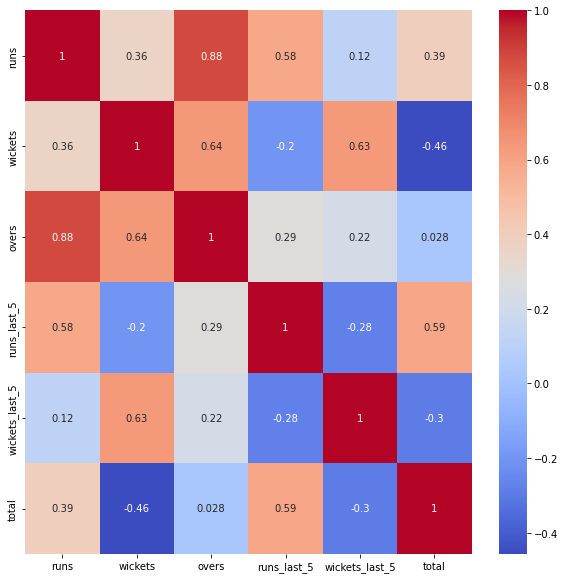

In [350]:
# Selecting correlated features using Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Get correlation of all the features of the dataset
corr_matrix = DataFrame.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(10,10))
g = sns.heatmap(data=DataFrame[top_corr_features].corr(), annot=True, cmap='coolwarm')

# Data Preprocessing
• Handling categorical features </br>
• Splitting dataset into train and test set on the basis of date

In [351]:
#Converting categorical features using OneHotEncoding method
encoded_DataFrame = pd.get_dummies(data=DataFrame, columns=['bat_team', 'bowl_team'])
encoded_DataFrame.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [352]:
encoded_DataFrame.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [353]:
# Rearranging the columns
encoded_DataFrame = encoded_DataFrame[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [354]:
# Splitting the data into train and test set
X_train = encoded_DataFrame.drop(labels='total', axis=1)[encoded_DataFrame['date'].dt.year <= 2016]
X_test = encoded_DataFrame.drop(labels='total', axis=1)[encoded_DataFrame['date'].dt.year >= 2017]

y_train = encoded_DataFrame[encoded_DataFrame['date'].dt.year <= 2016]['total'].values
y_test = encoded_DataFrame[encoded_DataFrame['date'].dt.year >= 2017]['total'].values

# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (37330, 21) and Test set: (2778, 21)


# Model Building
I will experiment with 5 different algorithms, they are as follows:</br>
• Linear Regression,
• Decision Tree Regression,
• Random Forest Regression ,
•Ridge Regression 
</br>
• Adaptive Boosting (AdaBoost) Algorithm </br>


# *Linear Regression*

In [355]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression()

In [356]:
# Predicting results
y_pred_lr = linear_regressor.predict(X_test)

In [357]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestClassifier
linear_regressor.score(X_test,y_test)

0.7522633566350525

In [358]:
# Linear Regression - Model Evaluation
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.118617546193295
Mean Squared Error (MSE): 251.00792310417455
Root Mean Squared Error (RMSE): 15.843229566732111


# *Decision Tree*

In [359]:
# Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [360]:
# Predicting results
y_pred_dt = decision_regressor.predict(X_test)

In [361]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))

Accuracy: 0.0251979841612671


In [362]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestClassifier
decision_regressor.score(X_test,y_test)

0.47348201204132656

In [363]:
# Decision Tree Regression - Model Evaluation
print("---- Decision Tree Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))

---- Decision Tree Regression - Model Evaluation ----
Mean Absolute Error (MAE): 17.037077033837292
Mean Squared Error (MSE): 533.4704823614111
Root Mean Squared Error (RMSE): 23.096979940273815


### *Random Forest*

In [364]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [365]:
# Predicting results
y_pred_rf = random_regressor.predict(X_test)

In [366]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestClassifier
random_regressor.score(X_test,y_test)

0.6711768895322154

In [367]:
# Random Forest Regression - Model Evaluation
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 13.80630315574754
Mean Squared Error (MSE): 333.16510995745347
Root Mean Squared Error (RMSE): 18.2528110152232


*Note: Since Linear Regression model performs best as compared to other two, we use this model and boost it's performance using AdaBoost Algorithm*

### *AdaBoost Algorithm*

In [368]:
# AdaBoost Model using Linear Regression as the base learner
from sklearn.ensemble import AdaBoostRegressor
adb_regressor = AdaBoostRegressor(base_estimator=linear_regressor, n_estimators=100)
adb_regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=100)

In [369]:
# Predicting results
y_pred_adb = adb_regressor.predict(X_test)

In [370]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestClassifier
adb_regressor.score(X_test,y_test)

0.755911522426137

In [371]:
# AdaBoost Regression - Model Evaluation
print("---- AdaBoost Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_adb)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_adb)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_adb))))

---- AdaBoost Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.151373669891214
Mean Squared Error (MSE): 247.31158450072115
Root Mean Squared Error (RMSE): 15.72614334478486


*Note: Using AdaBoost did not reduce the error to a significant level. Hence, we will you simple linear regression model for prediction*

## Ridge Regression Model + Grid Search CV

In [372]:
# Ridge Regression + Grid Search CV
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [373]:
# Loading model object 
ridge_regressor= Ridge()

In [374]:
# defining search space for Grid Search Cv
# prams dict
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40]}

In [375]:
# intialize the grid search Cv for searching best alpha
ridge_regressor = GridSearchCV(ridge_regressor, params, scoring = 'neg_mean_squared_error',cv = 5)

# training our model to find best hyperparameters
ridge_regressor.fit(X_train, y_train)

C:\Users\usha\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.24662e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\usha\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.47288e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\usha\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.53988e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\usha\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.43813e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\usha\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarn

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

# Prediction 
- Predicting on test data
- Visualizing how predicted data fit to our actual data

In [376]:
# prediction
y_predict_ridge= ridge_regressor.predict(X_test)

In [377]:
# checking for scores
from sklearn import metrics
import numpy as np # dependencyzz

# AdaBoost Regression - Model Evaluation
print("---- AdaBoost Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test,y_predict_ridge)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_predict_ridge)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_predict_ridge))))

---- AdaBoost Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.117294527005019
Mean Squared Error (MSE): 251.03172964112724
Root Mean Squared Error (RMSE): 15.843980864704655


In [378]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestClassifier
ridge_regressor.score(X_test,y_test)

-251.03172964112724

## **Predictions**
• Model *trained on* the data from **IPL Seasons 1 to 9** ie: (2008 to 2016)<br/>
• Model *tested on* data from **IPL Season 10** ie: (2017)<br/>
• Model *predicts on* data from **IPL Seasons 11 to 12** ie: (2018 to 2019)

In [379]:
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
  temp_array = list()

  # Batting Team
  if batting_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
  temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

  # Converting into numpy array
  temp_array = np.array([temp_array])

  # Prediction
  return int(linear_regressor.predict(temp_array)[0])

***Prediction 1*** </br>
• Date: 16th April 2018</br>
• IPL : Season 11</br>
• Match number: 13</br>
• Teams: Kolkata Knight Riders vs. Delhi Daredevils</br>
1. • First Innings final score: 200/9</br>

In [380]:
final_score = predict_score(
    batting_team='Kolkata Knight Riders', 
    bowling_team='Delhi Daredevils', 
    overs=9.2, 
    runs=79, 
    wickets=2, 
    runs_in_prev_5=60, 
    wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 159 to 174


C:\Users\usha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


***Prediction 2***</br>
• Date: 30th March 2019</br>
• IPL : Season 12</br>
• Match number: 9</br>
• Teams: Mumbai Indians vs. Kings XI Punjab</br>
• First Innings final score: 176/7</br>

In [381]:
final_score = predict_score(
    batting_team='Mumbai Indians', 
    bowling_team='Kings XI Punjab', 
    overs=12.3, 
    runs=113, 
    wickets=2, 
    runs_in_prev_5=55, 
    wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 179 to 194


C:\Users\usha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


***Prediction 3*** </br>
• Date: 10th May 2019<br/>
• IPL : Season 12<br/>
• Match number: 59 (Eliminator)<br/>
• Teams: Delhi Daredevils vs. Chennai Super Kings<br/>
• First Innings final score: 147/9

In [382]:
final_score = predict_score(
    batting_team='Delhi Daredevils', 
    bowling_team='Chennai Super Kings', 
    overs=10.2, 
    runs=68, 
    wickets=3, 
    runs_in_prev_5=29,
    wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 137 to 152


C:\Users\usha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [383]:
# creating our model pickel file - saving model
file_name = 'ipl_score_model.pkl'
pickle.dump(linear_regressor, open(file_name,'wb'))

In [384]:
joblib.dump(linear_regressor,'ipl_score_model.sav')

['ipl_score_model.sav']